# WeatherPy
----

#### Analyis:
Observed Trends
1.  The strongest correlation observed was between latitude & maximum temperature of a city in the Northern Hemisphere, suggesting the higher the latitude, or the more north you travel, the colder it gets.
2.  This is not neccesarily the case in the Southern Hemisphere. No correlation observed between city location and maximum temperature in the Southern Hemisphere cities.
3.  Cloudiness, humidity, and wind speed were also not dependent on city location. 

#### Suggestions for further analysis:
Compare current weather data with weather data from the 40 year archive to examine potential effects of global warming.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# # Import API key
from api_keys import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
print("Beginning Data Retrieval")
print("-------------------------")
counter = 1
city = 1
weather_check = []


url = "https://api.openweathermap.org/data/2.5/weather"

params = {"appid": api_key}

for city in range(len(cities)):
    
    params["city"] = city
    
    response = requests.get(url, params = params)
    weather_check = response.json()
    
    try:
        print(f"Processing Record {city} of Set {counter} | {cities[city]}")
        
    except(IndexError):
        print("City not found. Skipping...")
        counter += 1
        city =+ 0
print("-------------------------")            
print("Data Retrieval Complete")
print("-------------------------")


Beginning Data Retrieval
-------------------------
Processing Record 0 of Set 1 | rikitea
Processing Record 1 of Set 1 | nizhneyansk
Processing Record 2 of Set 1 | karratha
Processing Record 3 of Set 1 | baglan
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | nikolskoye
Processing Record 8 of Set 1 | guerrero negro
Processing Record 9 of Set 1 | zadar
Processing Record 10 of Set 1 | tubruq
Processing Record 11 of Set 1 | mehamn
Processing Record 12 of Set 1 | saskylakh
Processing Record 13 of Set 1 | arraial do cabo
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | portland
Processing Record 17 of Set 1 | jardim
Processing Record 18 of Set 1 | paragominas
Processing Record 19 of Set 1 | illoqqortoormiut
Processing Record 20 of Set 1 | avera
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | mersin

Processing Record 196 of Set 1 | la palma
Processing Record 197 of Set 1 | new norfolk
Processing Record 198 of Set 1 | alofi
Processing Record 199 of Set 1 | bousse
Processing Record 200 of Set 1 | praia
Processing Record 201 of Set 1 | buluang
Processing Record 202 of Set 1 | cherskiy
Processing Record 203 of Set 1 | coquimbo
Processing Record 204 of Set 1 | lincoln
Processing Record 205 of Set 1 | sisophon
Processing Record 206 of Set 1 | cacapava do sul
Processing Record 207 of Set 1 | dawei
Processing Record 208 of Set 1 | osa
Processing Record 209 of Set 1 | bluff
Processing Record 210 of Set 1 | syracuse
Processing Record 211 of Set 1 | lavrentiya
Processing Record 212 of Set 1 | parchim
Processing Record 213 of Set 1 | vao
Processing Record 214 of Set 1 | kimbe
Processing Record 215 of Set 1 | saint-pierre
Processing Record 216 of Set 1 | hay river
Processing Record 217 of Set 1 | attawapiskat
Processing Record 218 of Set 1 | grand river south east
Processing Record 219 of Set 

Processing Record 393 of Set 1 | garissa
Processing Record 394 of Set 1 | madoc
Processing Record 395 of Set 1 | westport
Processing Record 396 of Set 1 | gladstone
Processing Record 397 of Set 1 | mount isa
Processing Record 398 of Set 1 | kenai
Processing Record 399 of Set 1 | mantua
Processing Record 400 of Set 1 | obo
Processing Record 401 of Set 1 | ulladulla
Processing Record 402 of Set 1 | nanortalik
Processing Record 403 of Set 1 | tucumcari
Processing Record 404 of Set 1 | korla
Processing Record 405 of Set 1 | kalomo
Processing Record 406 of Set 1 | totma
Processing Record 407 of Set 1 | vardo
Processing Record 408 of Set 1 | waddan
Processing Record 409 of Set 1 | nantucket
Processing Record 410 of Set 1 | abha
Processing Record 411 of Set 1 | vestmanna
Processing Record 412 of Set 1 | hokitika
Processing Record 413 of Set 1 | tevaitoa
Processing Record 414 of Set 1 | satitoa
Processing Record 415 of Set 1 | monteagudo
Processing Record 416 of Set 1 | kavieng
Processing Reco

Processing Record 589 of Set 1 | fountain
Processing Record 590 of Set 1 | kayerkan
Processing Record 591 of Set 1 | farias brito
Processing Record 592 of Set 1 | porbandar
Processing Record 593 of Set 1 | miguel auza
Processing Record 594 of Set 1 | aykhal
Processing Record 595 of Set 1 | asheville
Processing Record 596 of Set 1 | makat
Processing Record 597 of Set 1 | qarqin
Processing Record 598 of Set 1 | puerto leguizamo
Processing Record 599 of Set 1 | cururupu
Processing Record 600 of Set 1 | galveston
Processing Record 601 of Set 1 | wanaka
Processing Record 602 of Set 1 | macaboboni
Processing Record 603 of Set 1 | shache
Processing Record 604 of Set 1 | ossora
Processing Record 605 of Set 1 | metro
Processing Record 606 of Set 1 | sokolskoye
Processing Record 607 of Set 1 | asadabad
Processing Record 608 of Set 1 | maromitsa
Processing Record 609 of Set 1 | betare oya
-------------------------
Data Retrieval Complete
-------------------------


In [19]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []



for city in cities:
    query_url = url + "appid=" + api_key + "&q=" + city + "&units=" + units
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    try:
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        max_temp.append(weather_json["main"]["temp_max"])
        humidity.append(weather_json["main"]["humidity"])
        cloudiness.append(weather_json["clouds"]["all"])
        wind_speed.append(weather_json["wind"]["speed"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        
        
    except(KeyError, IndexError):
        lat.append(0)
        lng.append(0)
        max_temp.append(0)
        humidity.append(0)
        cloudiness.append(0)
        wind_speed.append(0)
        country.append(0)
        date.append(0)
       
       

In [20]:
weather_dict = {
    "City" : cities, 
    "Lat" : lat,
    "Lng" : lng,
    "Max Temp" : max_temp,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind_speed,
    "Country" : country,
    "Date" : date
}

weather_df = pd.DataFrame(weather_dict)

In [21]:
count_missing_info = (weather_df['Lng'] == 0).sum()
print(f"Number of cities with missing info: {count_missing_info}")

Number of cities with missing info: 51


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
#Export to CSV
weather_df.to_csv("../WeatherPy/weather.csv", index=False)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,79.12,74,0,17.52,PF,1649640668
1,nizhneyansk,0.0000,0.0000,0.00,0,0,0.00,0,0
2,karratha,-20.7377,116.8463,89.04,27,0,8.70,AU,1649640668
3,baglan,36.1307,68.7083,76.50,33,100,1.10,AF,1649640669
4,tuktoyaktuk,69.4541,-133.0374,3.20,66,20,13.80,CA,1649640669
...,...,...,...,...,...,...,...,...,...
605,metro,-5.1131,105.3067,83.95,67,80,5.82,ID,1649640888
606,sokolskoye,57.1412,43.1589,38.61,99,100,2.57,RU,1649640889
607,asadabad,34.7824,48.1185,40.95,40,39,3.00,IR,1649640889
608,maromitsa,59.8683,48.0123,36.61,99,100,7.00,RU,1649640889


In [23]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,6.100000e+02
mean,18.700508,18.294092,53.380705,64.437705,55.690164,7.715951,1.511720e+09
std,32.424725,86.956693,26.986692,28.834393,41.551488,6.220033,4.569901e+08
min,-54.800000,-179.166700,-8.370000,0.000000,0.000000,0.000000,0.000000e+00
25%,-5.177450,-53.460025,35.090000,50.000000,8.250000,3.135000,1.649641e+09
50%,18.819050,15.260700,61.630000,74.000000,68.000000,6.340000,1.649641e+09
75%,46.645875,89.174275,75.887500,86.000000,100.000000,11.040000,1.649641e+09
max,78.218600,178.416700,92.970000,100.000000,100.000000,32.010000,1.649641e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
humidity_100 = weather_df.loc[weather_df["Humidity"] > 100, :]
humidity_100
#There are no cities with humidity > 100%

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [25]:
weather_df = weather_df[weather_df['Lat'] != 0]
count_missing_info = (weather_df['Lng'] == 0).sum()
print(f"Number of cities with missing info: {count_missing_info}")

Number of cities with missing info: 0


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder
* Below are examples of what you should get but your results will be different.

## Latitude vs. Temperature Plot

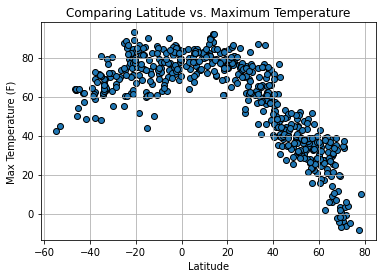

In [110]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker = "o", edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Comparing Latitude vs. Maximum Temperature")
plt.grid()
plt.savefig("../WeatherPy/Images/MaxTemp.png")
plt.show()

## Latitude vs. Humidity Plot

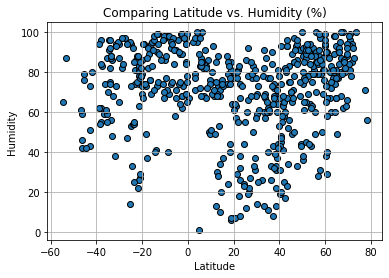

In [109]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker = "o", edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Comparing Latitude vs. Humidity (%)")
plt.grid()
plt.savefig("../WeatherPy/Images/Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

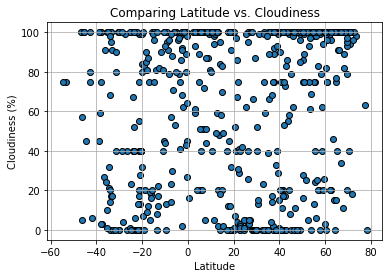

In [108]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker = "o", edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Comparing Latitude vs. Cloudiness")
plt.grid()
plt.savefig("../WeatherPy/Images/Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

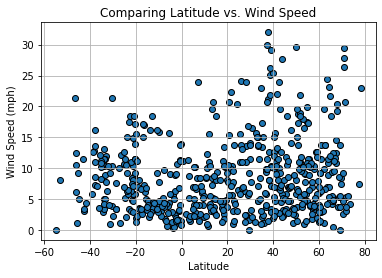

In [107]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker = "o", edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Comparing Latitude vs. Wind Speed")
plt.grid()
plt.savefig("../WeatherPy/Images/WindSpeed.png")
plt.show()

## Linear Regression

In [40]:
northern_hemisphere = weather_df.loc[weather_df["Lat"]>0, :]
southern_hemisphere = weather_df.loc[weather_df["Lat"]<0, :]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

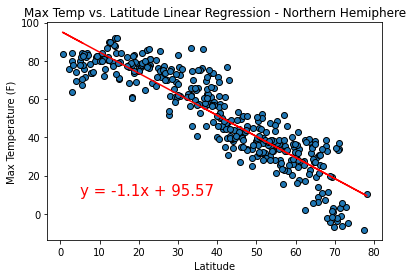

The rvalue is 0.8192237151072636.
This suggests a strong correlation between latitude & maximum temperature of a city in the Northern Hemisphere.
The higher the latitude, or the more north you travel, the colder it gets.


In [106]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, marker = "o", edgecolor = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Max Temp vs. Latitude Linear Regression - Northern Hemiphere")
plt.savefig("../WeatherPy/Images/MaxTempRegressionNorthHemi.png")
plt.show()

print(f"The rvalue is {rvalue ** 2}.")
print(f"This suggests a strong correlation between latitude & maximum temperature of a city in the Northern Hemisphere.")
print(f"The higher the latitude, or the more north you travel, the colder it gets.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

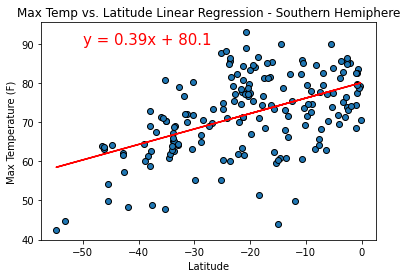

The rvalue is 0.2602657571878844
This suggests no correlation between latitude & maximum temperature of a city in the Southern Hemisphere.
Temperatures vary quite a bit across the Southern Hemisphere.


In [105]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, marker = "o", edgecolor = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-50,90), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Max Temp vs. Latitude Linear Regression - Southern Hemiphere")
plt.savefig("../WeatherPy/Images/MaxTempRegressionSouthHemi.png")
plt.show()

print(f"The rvalue is {rvalue ** 2}")
print(f"This suggests no correlation between latitude & maximum temperature of a city in the Southern Hemisphere.")
print(f"Temperatures vary quite a bit across the Southern Hemisphere.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

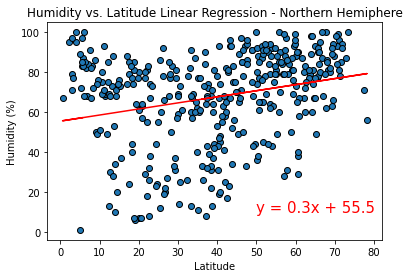

The rvalue is 0.06599750104849003.
This suggests there is no correlation between latitude & humidity of a city in the Northern Hemisphere.
Humidity is not dependent on location of a city in the Northern Hemisphere.


In [104]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, marker = "o", edgecolor = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(50,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs. Latitude Linear Regression - Northern Hemiphere")
plt.savefig("../WeatherPy/Images/HumidityRegressionNorthHemi.png")
plt.show()

print(f"The rvalue is {rvalue ** 2}.")
print(f"This suggests there is no correlation between latitude & humidity of a city in the Northern Hemisphere.")
print(f"Humidity is not dependent on location of a city in the Northern Hemisphere.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

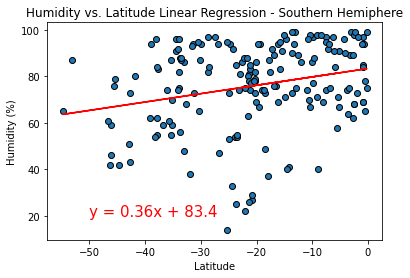

The rvalue is 0.06423014490804546.
This suggests there is no correlation between latitude & humidity of a city in the Southern Hemisphere.
Humidity is not dependent on location of a city in the Southern Hemisphere.


In [103]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, marker = "o", edgecolor = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-50,20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs. Latitude Linear Regression - Southern Hemiphere")
plt.savefig("../WeatherPy/Images/HumidityRegressionSouthHemi.png")
plt.show()

print(f"The rvalue is {rvalue ** 2}.")
print(f"This suggests there is no correlation between latitude & humidity of a city in the Southern Hemisphere.")
print(f"Humidity is not dependent on location of a city in the Southern Hemisphere.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

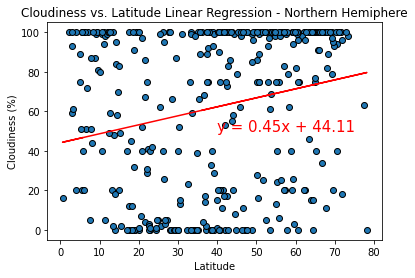

The rvalue is 0.048699552904411934.
This suggests there is no correlation between latitude & cloudiness of a city in the Northern Hemisphere.
The amount of cloud cover is not dependent on location of a city in the Northern Hemisphere.


In [102]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, marker = "o", edgecolor = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(40,50), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs. Latitude Linear Regression - Northern Hemiphere")
plt.savefig("../WeatherPy/Images/CloudRegressionNorthHemi.png")
plt.show()

print(f"The rvalue is {rvalue ** 2}.")
print(f"This suggests there is no correlation between latitude & cloudiness of a city in the Northern Hemisphere.")
print(f"The amount of cloud cover is not dependent on location of a city in the Northern Hemisphere.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

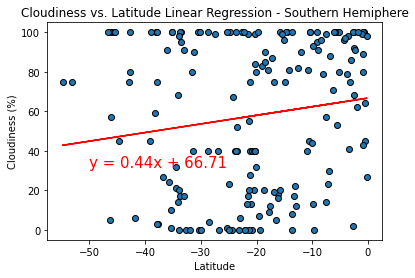

The rvalue is 0.022633981320750098.
This suggests there is no correlation between latitude & cloudiness of a city in the Southern Hemisphere.
The amount of cloud cover is not dependent on location of a city in the Southern Hemisphere.


In [101]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, marker = "o", edgecolor = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-50,32), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness vs. Latitude Linear Regression - Southern Hemiphere")
plt.savefig("../WeatherPy/Images/CloudRegressionSouthHemi.png")
plt.show()

print(f"The rvalue is {rvalue ** 2}.")
print(f"This suggests there is no correlation between latitude & cloudiness of a city in the Southern Hemisphere.")
print(f"The amount of cloud cover is not dependent on location of a city in the Southern Hemisphere.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

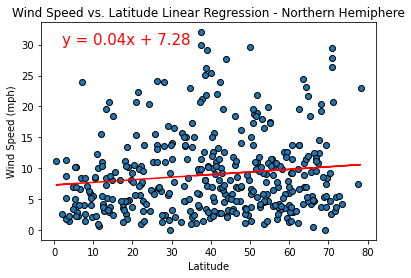

The rvalue is 0.01643194035424492.
This suggests there is no correlation between latitude & wind speed in city in the Northern Hemisphere.
The wind speed is not dependent on the location of a city in the Northern Hemisphere.


In [100]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, marker = "o", edgecolor = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(2,30), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed vs. Latitude Linear Regression - Northern Hemiphere")
plt.savefig("../WeatherPy/Images/WindRegressionNorthHemi.png")
plt.show()

print(f"The rvalue is {rvalue ** 2}.")
print(f"This suggests there is no correlation between latitude & wind speed in city in the Northern Hemisphere.")
print(f"The wind speed is not dependent on the location of a city in the Northern Hemisphere.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

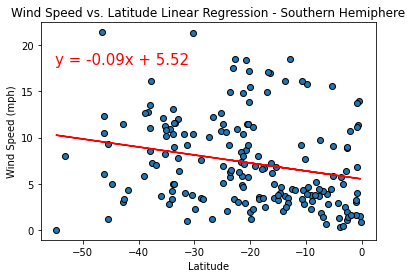

The rvalue is 0.05520386183592321.
This suggests there is no correlation between latitude & wind speed in city in the Southern Hemisphere.
The wind speed is not dependent on the location of a city in the Southern Hemisphere.


In [99]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, marker = "o", edgecolor = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-55,18), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed vs. Latitude Linear Regression - Southern Hemiphere")
plt.savefig("../WeatherPy/Images/WindRegressionSouthHemi.png")
plt.show()

print(f"The rvalue is {rvalue ** 2}.")
print(f"This suggests there is no correlation between latitude & wind speed in city in the Southern Hemisphere.")
print(f"The wind speed is not dependent on the location of a city in the Southern Hemisphere.")